# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Twitter Sentiment Classification

**Many companies are built around lessening one’s environmental impact or carbon footprint.** They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, **EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.**

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies

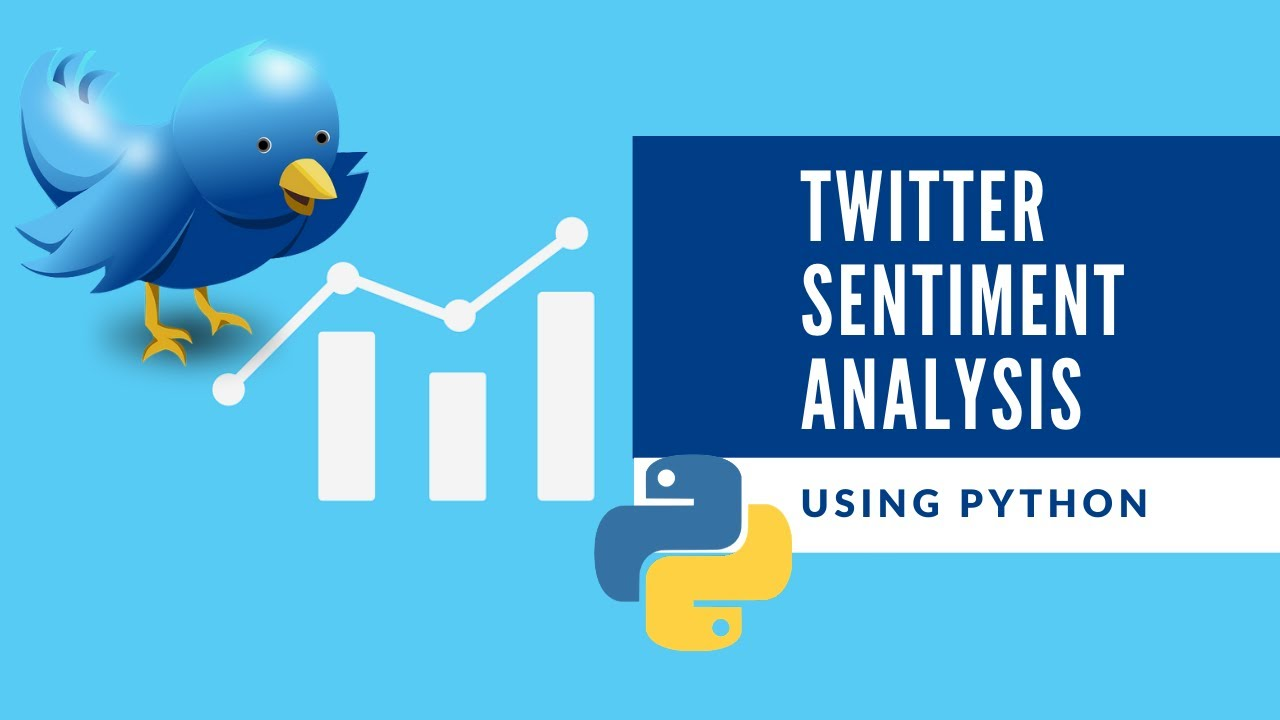

### Meet The Team_ES2
- 1. Lebuso Tsilo
- 2. Jabulile Mkhwanazi
- 3. Peakanyo Kgomosotho
- 4. Daisy Mangue
- 5. Thoriso Lerata
- 6. Vusumzi Mbiyo

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Import comet_ml at the top of your file
#from comet_ml import Experiment

# Create an experiment with your api key
"""""
experiment = Experiment(
    api_key="TaVXMUoLUETmSvHMTSLEMNb7s",
    project_name="2207ftds-team-es2",
    workspace="philiase",
)

# Run your code and go to /
"""""

'""\nexperiment = Experiment(\n    api_key="TaVXMUoLUETmSvHMTSLEMNb7s",\n    project_name="2207ftds-team-es2",\n    workspace="philiase",\n)\n\n# Run your code and go to /\n'

In [23]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualization packages used to plot graphs
%matplotlib inline
from scipy import stats # Package for statistics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from nltk.stem import WordNetLemmatizer

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


# Data Preprocessing

To remove the noise caused by connectors or otherwise called Stop words remove special characters, spaces or Tabs emojies,urls,hashtags.

In [12]:
def processing(tweet):
    
    '''
    This function takes in a string and cleans the string of urls, punctuation, whitespace, etc.
    
    Parameters:
        tweet (str): tweet in the form of a string
                    

    Returns:
        tweet (str): cleaned version of input tweet

    '''
    
    tweet = tweet.lower()
    tweet = re.sub(r'http[s]?:\/\/\S+', '', tweet) # Remove url's
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)  # Remove @mentions 
    tweet = re.sub(r'#\w*', '', tweet)  # Remove hashtags    
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers  
    tweet = re.sub(r"[_,-.;':#?!\&/$]+\ *", ' ', tweet)  # Remove punctuation
    tweet = re.sub(r"U+FFFD ", ' ', tweet)     # Remove that funny diamond
    tweet = re.sub(r'\s\s+', ' ', tweet) # Remove extra whitespace
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = tweet.lstrip(' ') # Remove space in front of tweet
    
    
    return tweet

In [30]:
rename_labels = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
df_train["sentiment_string"] = df_train["sentiment"].apply(lambda x: rename_labels[x])
df_train.head()

,sentiment,message,tweetid,sentiment_string
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,Pro
2,2,RT @RawStory: Researchers say we have three ye...,698562,News
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,Pro


In [14]:
display(df_train.head())

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [15]:
#checking duplicates
msg= df_train['message']
df_train[msg.isin(msg[msg.duplicated()])]

,sentiment,message,tweetid
10,1,RT @StephenSchlegel: she's thinking about how ...,295793
17,1,RT @patagonia: If our elected leaders fail to ...,490604
18,1,RT @SenSanders: We have a president-elect who ...,228658
21,1,RT @World_Wildlife: How climate change impacts...,690605
35,1,RT @BernieSanders: #ImVotingBecause the future...,817108
...,...,...,...
15781,1,RT @StephenSchlegel: she's thinking about how ...,869993
15799,1,RT @SethMacFarlane: HRC proposes installing ha...,52528
15801,1,RT @SenSanders: On virtually every major issue...,331127
15811,1,RT @StephenSchlegel: she's thinking about how ...,426353


In [16]:
#removing duplicates
df_train.drop_duplicates(subset = "message",keep = False,inplace = True)
df_train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15813,1,RT @thinkprogress: EPA head falsely claims car...,442853
15814,1,RT @ezlusztig: They took down the material on ...,22001
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


# Lemmatisation

Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results. Because search engine algorithms use lemmatization, the user is free to query any inflectional form of a word and get relevant results

In [24]:
#Stemming and Lemma
lemma = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
display(df_train.head())

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [22]:
  '''
    This function takes in a string and lemmatizes the string, which is to
    return the base or dictionary form of a word, which is known as the lemma.
    
    Parameters:
        tweet (str): tweet in the form of a string
                    

    Returns:
        tweet (str): tweet with words converted into their base lemma. 

    '''

def lemmatize(string):
       word_pos_tag = nltk.pos_tag(word_tokenize(string))
       x = [lemma.lemmatize(tag[0],get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tag)]
       return " ".join(x) 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.We first need to understand our data better, visualise, summarise and interpret the information in the dataset. We will first look at our Tweet distribution in all four categories, look at the most frequent hashtags authors use in the dataset, lastly look at the most frequent words used in tweets to gain better insight on how people express their views on different topics.

In [4]:
df_train.shape

(15819, 3)

In [5]:
#checking for missing/null value
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [6]:
#rows and columns in the dataset
print('Count of columns in the data is:  ', len(df_train.columns))
print('Count of rows in the data is:  ', len(df_train))

Count of columns in the data is:   3
Count of rows in the data is:   15819


In [7]:
#checking unique target values
df_train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [8]:
# Taking a look at the statistics of numerical columns
df_train[['sentiment','tweetid']].describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


<AxesSubplot:xlabel='tweetid'>

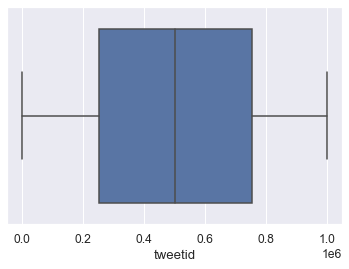

In [35]:
#checking for outliers on tweet ID columns
#fig, axes = plt.subplots(0, 0, figsize = (15,15))
sns.boxplot(data = df_train , x='tweetid')

In [36]:
# Separate the classes
news = df_train[df_train['sentiment']==2]
pro = df_train[df_train['sentiment']==1]
neutral = df_train[df_train['sentiment']==0]
anti = df_train[df_train['sentiment']==-1]

Text(0.5, 1.0, 'Distribution of classes')

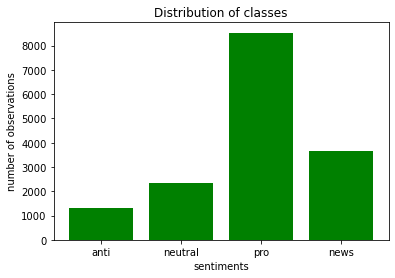

In [35]:
# Get all possible labels
labels = df_train['sentiment'].unique()
heights = [len(pro),len(news),len(neutral),len(anti)]
plt.bar(labels,heights,color='green')
plt.xticks(labels,['pro','news', 'neutral', 'anti'])
plt.xlabel('sentiments')
plt.ylabel("number of observations")
plt.title('Distribution of classes')

Many of the tweets are from people who believe in man-made climate change. Unresolved class imbalance can lead to the classifier been good at predicting the class(es) with the majority of the data points in the dataset. Whether class imbalance results in poor performance or not is something that will be tested.

<AxesSubplot:title={'center':'Percentage of sentiment'}, ylabel='sentiment'>

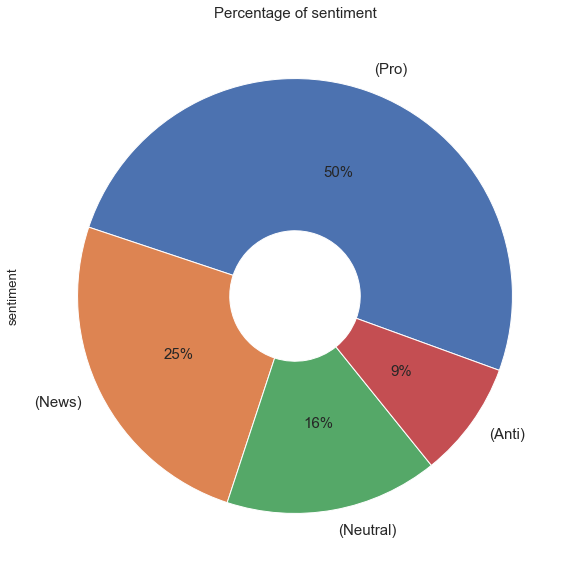

In [37]:
plt.figure(figsize=(15,10))
plt.title('Percentage of sentiment', fontsize=15)
df_train.sentiment.value_counts().plot(kind='pie', labels=['(Pro)', '(News)', '(Neutral)', '(Anti)'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

***length of tweets per class***

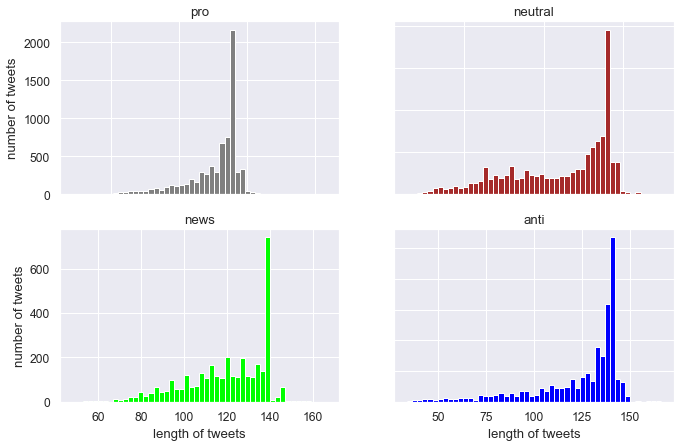

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(11,7))

axs[0, 0].hist(pro.message.str.len(),bins=50,label='pro',color='grey')
axs[0, 0].set_title('pro')

axs[1, 0].set_title('news')
axs[1, 0].hist(news.message.str.len(),bins=50,label='news',color='lime')

axs[0, 1].set_title('neutral')
axs[0, 1].hist(neutral.message.str.len(),bins=50,label='neutral',color='brown')

axs[1, 1].set_title('anti')
axs[1, 1].hist(anti.message.str.len(),bins=50,label='anti',color='blue')

for ax in axs.flat:
    ax.set(xlabel='length of tweets', ylabel='number of tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

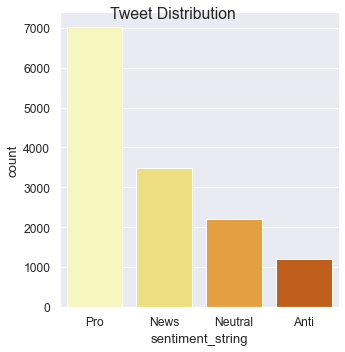

In [34]:
# plotting bar graph
sns.set(font_scale=1.1)
ax1 = sns.catplot("sentiment_string", data=df_train, kind="count", palette = sns.color_palette('afmhot_r'))
ax1.fig.suptitle('Tweet Distribution')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic